## Assignment 4: Pandas

This assignment is about data processing and plotting.

### How to hand in
The assignment is expected to be published on GitHub, but the actual hand-in is on peergrade and should contain only a link to a MyBinder. The assignment should fit in *a single Jupyter Notebook*.

Remember her to use the link provided when first registering your notebook with mybinder (not the url taken from your browsers adress field). See the notebook `12-Assignments` for more information.

## Use pandas dataframe with poverty data
Use this source: https://data.worldbank.org/indicator/SI.POV.DDAY and extract the csv file in jupyter notebook.
With the help of Pandas' DataFrame do the following
1. Create a line graph showing the development in poverty over time in both Argentina, Ivory cost, USA. (be aware of the missing data in particular years)

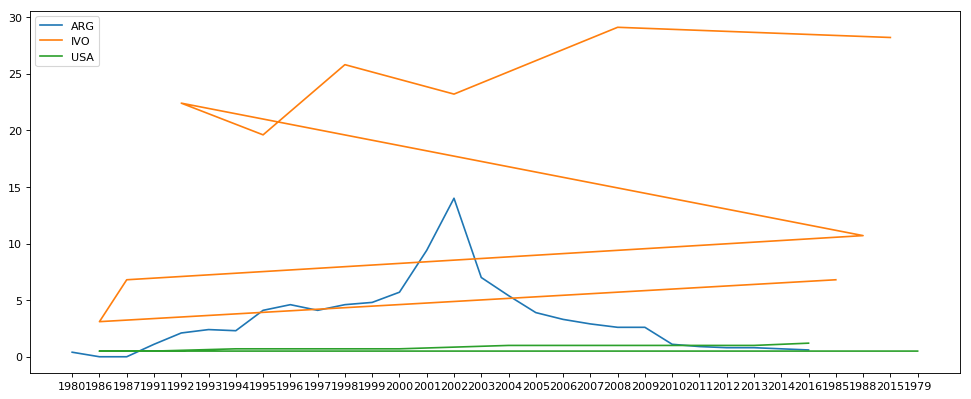

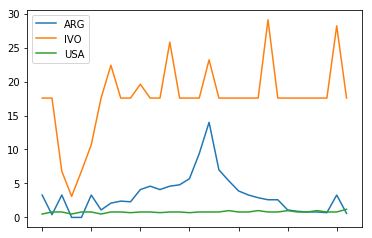

In [288]:
# mangler at få skrevet år-værdierne ud på x-aksen
# prøv at køre den et par gange hvis ikke den viser figuren med det samme
# har valgt at sætte gennemsnitsværdier ind der hvor der står nAn - man kan gøre andre ting også
# ignorer den fil der hedder functions.py

import pandas as pd
import matplotlib.pyplot as plt

filename = "API_SI.POV.DDAY_DS2_en_csv_v2_10474275.csv"

df = pd.read_csv(filename, header=2)
df.drop([0,1])

# creating series for arg, ivo and usa
# below line finds country from name and takes the index value as an int, so it can be used dynamically in iloc
arg_index = df[df['Country Name'] == 'Argentina'].index.values.astype(int)[0]
arg = df.iloc[arg_index, :]
arg = arg.dropna()
arg = arg[4:]

ivo_index = df[df['Country Name'] == "Cote d'Ivoire"].index.values.astype(int)[0]
ivo = df.iloc[ivo_index, :]
ivo = ivo.dropna()
ivo = ivo[4:]

usa_index = df[df['Country Name'] == "United States"].index.values.astype(int)[0]
usa = df.iloc[usa_index, :]
usa = usa.dropna()
usa = usa[4:]

# creating dict of series
my_dict = {'ARG': arg, 'IVO': ivo, 'USA': usa}

# .axes[0].tolist() returns years as a list
plt.figure(figsize=(15,6), dpi=80)
plt.plot(arg.axes[0].tolist(), arg.values, label = 'ARG')
plt.plot(ivo.axes[0].tolist(), ivo.values, label = 'IVO')
plt.plot(usa.axes[0].tolist(), usa.values, label = 'USA')
plt.legend()


# creating dataframe from dict
my_df = pd.DataFrame(my_dict)
# filling the missing values with the mean value for each country
my_df = my_df.fillna(my_df.mean())

# print(my_df)
my_df.plot()

2. Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart

3. Show the development of absolute poverty in all the central american countries. Hand in:
  1. A description of what graphical representation you think is best for this task
    * See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html
  2. The actual graphical representation in a Jupyter Notebook

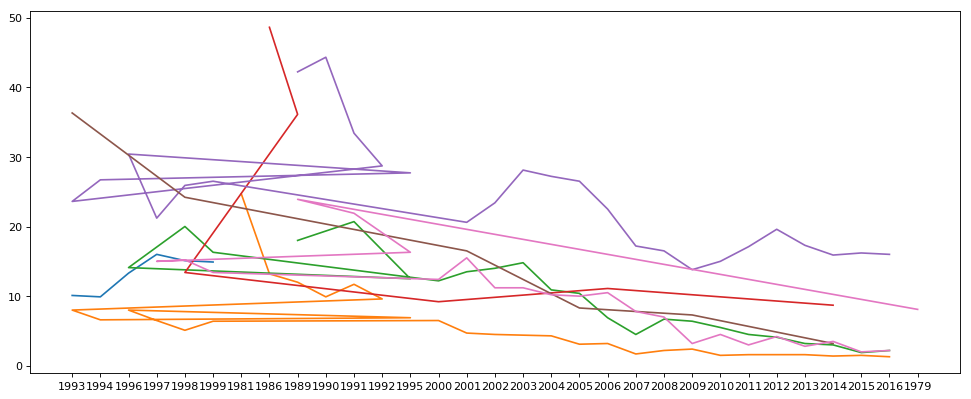

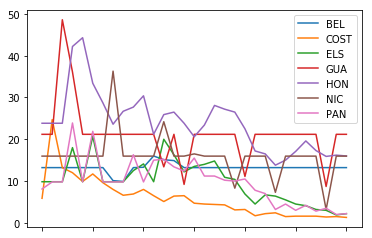

In [291]:
# creating series for arg, ivo and usa
bel_index = df[df['Country Name'] == "Belize"].index.values.astype(int)[0]
bel = df.iloc[bel_index, :]
bel = bel.dropna()
bel = bel[4:]

cost_index = df[df['Country Name'] == "Costa Rica"].index.values.astype(int)[0]
cost = df.iloc[cost_index, :]
cost = cost.dropna()
cost = cost[4:]

els_index = df[df['Country Name'] == "El Salvador"].index.values.astype(int)[0]
els = df.iloc[els_index, :]
els = els.dropna()
els = els[4:]

gua_index = df[df['Country Name'] == "Guatemala"].index.values.astype(int)[0]
gua = df.iloc[gua_index, :]
gua = gua.dropna()
gua = gua[4:]

hon_index = df[df['Country Name'] == "Honduras"].index.values.astype(int)[0]
hon = df.iloc[hon_index, :]
hon = hon.dropna()
hon = hon[4:]

nic_index = df[df['Country Name'] == "Nicaragua"].index.values.astype(int)[0]
nic = df.iloc[nic_index, :]
nic = nic.dropna()
nic = nic[4:]

pan_index = df[df['Country Name'] == "Panama"].index.values.astype(int)[0]
pan = df.iloc[pan_index, :]
pan = pan.dropna()
pan = pan[4:]




# creating dict of series
my_dict = {'BEL': bel, 'COST': cost, 'ELS': els, 'GUA': gua, 'HON': hon, 'NIC': nic, 'PAN': pan}

# .axes[0].tolist() returns years as a list
# plots each country into the figure
plt.figure(figsize=(15,6), dpi=80)
plt.plot(bel.axes[0].tolist(), bel.values)
plt.plot(cost.axes[0].tolist(), cost.values)
plt.plot(els.axes[0].tolist(), els.values)
plt.plot(gua.axes[0].tolist(), gua.values)
plt.plot(hon.axes[0].tolist(), hon.values)
plt.plot(nic.axes[0].tolist(), nic.values)
plt.plot(pan.axes[0].tolist(), pan.values)


# creating dataframe from dict
my_df = pd.DataFrame(my_dict)
# filling the missing values with the mean value for each country
my_df = my_df.fillna(my_df.mean())

# print(my_df)

my_df.plot()


4. From the worldbank api, find one more interesting question you would like to ask. Hand in:
  1. A description of why that question is interesting
  2. A visualisation of the question in your Jupyter Notebook
    * See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html